<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Wafa Hamdan Alshehri

<img src="1.jpg" style="border: none; width: 80%;">

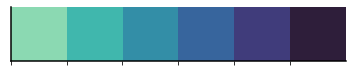

In [1]:
# 1.Importing The Libraries

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

colors=sns.color_palette("mako_r")
sns.palplot(colors)


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
# 2.Loading and Reading The Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
618            9      112             82             24        0  28.2   
42             7      106             92             18        0  22.7   
367            0      101             64             17        0  21.0   

     DiabetesPedigreeFunction  Age  Outcome  
618                     1.282   50        1  
42                      0.235   48        0  
367                     0.252   21        0

In [3]:
# EDA

In [4]:
# 3.Information Of The Dataset
df.shape

(768, 9)

In [5]:
#The dimensions of the dataset
df.ndim

2

In [6]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#numerical variables in dataset

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'c']
print('Number of numerical variables: ', len(numerical_features))
print('='*50,'\n Numerical Variables Column: ',numerical_features ) 

Number of numerical variables:  9
 Numerical Variables Column:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [8]:
#Categorical variables in dataset

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'c']
print('Number of Categorical variables: ', len(cat_features))
print('='*50,'\n Categorical Variables Column: ',cat_features)

Number of Categorical variables:  0
 Categorical Variables Column:  []


In [9]:
# 4.Finding The Unique Values In Target Features

In [10]:
pd.value_counts(df.Outcome)

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# 5.Finding The Missing Values 

In [12]:
# number of missing values in the dataset
missing_values = df.isnull().sum() 
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# 6.Finding The Duplicates Records

In [14]:
#Finding the duplicates from dataset

dupl = df.duplicated().sum()

if(dupl == 0 ):
  print("Not Finding the duplicates: ",dupl)

else:
  print("Finding the duplicates: ",dupl)
  df.drop_duplicates(inplace=True)


Not Finding the duplicates:  0


In [15]:
# 7.Basics Statistics

In [16]:
round(df.describe(exclude = ['object']), 2).T.style.background_gradient(cmap='rocket')

In [17]:
# 8.Analysis

In [18]:
# using Histograms to show the distribution of Pregnancies
fig = px.histogram(df, 
                   x="Pregnancies",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Pregnancies Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of Glucose
fig = px.histogram(df, 
                   x="Glucose",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Glucose Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()
# using Histograms to show the distribution of BloodPressure
fig = px.histogram(df, 
                   x="BloodPressure",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BloodPressure Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of SkinThickness
fig = px.histogram(df, 
                   x="SkinThickness",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The SkinThickness Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()

# using Histograms to show the distribution of Insulin
fig = px.histogram(df, 
                   x="Insulin",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Insulin Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of BMI
fig = px.histogram(df, 
                   x="BMI",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BMI Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()

# using Histograms to show the distribution of DiabetesPedigreeFunction
fig = px.histogram(df, 
                   x="DiabetesPedigreeFunction",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The DiabetesPedigreeFunction Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of Age
fig = px.histogram(df, 
                   x="Age",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Age Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()
#==========================================================================================
# using pie to show the  of Outcome

fig = px.pie(df,
             values=df['Outcome'].value_counts(),
             names=df['Outcome'].value_counts().index,
             template ="simple_white",# without the horizontal line
             title = "<b> Distribution Of The Outcome Features </b>",
             color_discrete_sequence = px.colors.diverging.balance)
fig.show()

# 9.Data Cleaning

### Glucose, blood pressure, Skin Thickness, Insulin and BMI cannot be ---> [zero]
### I will replace the zero with their mean or median value 

In [19]:
print('*'*80,'\n Total number of rows : {0}'.format(len(df)))
print('*'*80)
print("1.Number of the rows having zero's in glucose feature: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("2.Number of the rows having zero's in bloodpressure feature: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("3.Number of the rows having zero's in skinthickness feature: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("4.Number of the rows having zero's in insulin feature: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("5.Number of the rows having zero's in bmi feature: {0}".format(len(df.loc[df['BMI'] == 0])))
print("6.Number of the rows having zero's in diabetespedigreefunction feature: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("7.Number of the rows having zero's in age feature: {0}".format(len(df.loc[df['Age'] == 0])))

******************************************************************************** 
 Total number of rows : 768
********************************************************************************
1.Number of the rows having zero's in glucose feature: 5
2.Number of the rows having zero's in bloodpressure feature: 35
3.Number of the rows having zero's in skinthickness feature: 227
4.Number of the rows having zero's in insulin feature: 374
5.Number of the rows having zero's in bmi feature: 11
6.Number of the rows having zero's in diabetespedigreefunction feature: 0
7.Number of the rows having zero's in age feature: 0


In [20]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [21]:
print('*'*80,'\n Total number of rows : {0}'.format(len(df)))
print('*'*80)
print("1.Number of the rows having zero's in glucose feature: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("2.Number of the rows having zero's in bloodpressure feature: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("3.Number of the rows having zero's in skinthickness feature: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("4.Number of the rows having zero's in insulin feature: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("5.Number of the rows having zero's in bmi feature: {0}".format(len(df.loc[df['BMI'] == 0])))
print("6.Number of the rows having zero's in diabetespedigreefunction feature: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("7.Number of the rows having zero's in age feature: {0}".format(len(df.loc[df['Age'] == 0])))

******************************************************************************** 
 Total number of rows : 768
********************************************************************************
1.Number of the rows having zero's in glucose feature: 0
2.Number of the rows having zero's in bloodpressure feature: 0
3.Number of the rows having zero's in skinthickness feature: 0
4.Number of the rows having zero's in insulin feature: 0
5.Number of the rows having zero's in bmi feature: 0
6.Number of the rows having zero's in diabetespedigreefunction feature: 0
7.Number of the rows having zero's in age feature: 0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
df["Glucose"]=df["Glucose"].astype(int)
df["BloodPressure"]=df["BloodPressure"].astype(int)
df["SkinThickness"]=df["SkinThickness"].astype(int)
df["Insulin"]=df["Insulin"].astype(int)

# visualize the features after the data cleaning

In [24]:
# using Histograms to show the distribution of Pregnancies
fig = px.histogram(df, 
                   x="Pregnancies",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Pregnancies Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of Glucose
fig = px.histogram(df, 
                   x="Glucose",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Glucose Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()
# using Histograms to show the distribution of BloodPressure
fig = px.histogram(df, 
                   x="BloodPressure",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BloodPressure Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of SkinThickness
fig = px.histogram(df, 
                   x="SkinThickness",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The SkinThickness Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()

# using Histograms to show the distribution of Insulin
fig = px.histogram(df, 
                   x="Insulin",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Insulin Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of BMI
fig = px.histogram(df, 
                   x="BMI",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BMI Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()

# using Histograms to show the distribution of DiabetesPedigreeFunction
fig = px.histogram(df, 
                   x="DiabetesPedigreeFunction",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The DiabetesPedigreeFunction Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of Age
fig = px.histogram(df, 
                   x="Age",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Age Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()
#==========================================================================================
# using pie to show the  of Outcome

fig = px.pie(df,
             values=df['Outcome'].value_counts(),
             names=df['Outcome'].value_counts().index,
             template ="simple_white",# without the horizontal line
             title = "<b> Distribution Of The Outcome Features </b>",
             color_discrete_sequence = px.colors.diverging.balance)
fig.show()

# 10.Detect The Outliers & Deal With It

### some of the feautures are having outliers 
Outliers ideally are the extreme values for the specific column which affects the generalization of the data and model. 
Outliers mostly affect the regression models as it changes the equation drastically 
### so we will use IQR technique to deal with outliers.

In [25]:
# Visualizing the Numerical Columns (Hidden Input) and treating outliers
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
                
i = 0 #counter
for cols in columns:
    # Removing Outliers 
    Q3 = df[cols].quantile(0.99)
    df = df[df[cols] <= Q3]
    Q1 = df[cols].quantile(0.01)
    df = df[df[cols] >= Q1]
    print(cols)
    print("Q1:-",Q1)
    print("Q3:-",Q3)
    i=i+1

Pregnancies
Q1:- 0.0
Q3:- 13.0
Glucose
Q1:- 67.57
Q3:- 196.0
BloodPressure
Q1:- 44.0
Q3:- 106.0
SkinThickness
Q1:- 10.0
Q3:- 50.629999999999995
Insulin
Q1:- 29.54
Q3:- 495.0
BMI
Q1:- 19.5
Q3:- 47.9
DiabetesPedigreeFunction
Q1:- 0.09167
Q3:- 1.4809599999999954
Age
Q1:- 21.0
Q3:- 67.0


# Plot Histrogram of Pregnancies Features after the treating the outlier

In [26]:
# using Histograms to show the distribution of Pregnancies
fig = px.histogram(df, 
                   x="Pregnancies",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Pregnancies Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of Glucose
fig = px.histogram(df, 
                   x="Glucose",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Glucose Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()
# using Histograms to show the distribution of BloodPressure
fig = px.histogram(df, 
                   x="BloodPressure",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BloodPressure Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of SkinThickness
fig = px.histogram(df, 
                   x="SkinThickness",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The SkinThickness Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()

# using Histograms to show the distribution of Insulin
fig = px.histogram(df, 
                   x="Insulin",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Insulin Features </b>",
                   color_discrete_sequence = px.colors.diverging.Tropic)
fig.show()

# using Histograms to show the distribution of BMI
fig = px.histogram(df, 
                   x="BMI",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The BMI Features </b>",
                   color_discrete_sequence = px.colors.diverging.RdYlBu_r)
fig.show()

# using Histograms to show the distribution of DiabetesPedigreeFunction
fig = px.histogram(df, 
                   x="DiabetesPedigreeFunction",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The DiabetesPedigreeFunction Features </b>",
                   color_discrete_sequence = px.colors.diverging.PRGn)
fig.show()

# using Histograms to show the distribution of Age
fig = px.histogram(df, 
                   x="Age",
                   marginal="box",
                   template ="simple_white",# without the horizontal line
                   title = "<b> Distribution Of The Age Features </b>",
                   color_discrete_sequence = px.colors.diverging.delta)
fig.show()
#==========================================================================================
# using pie to show the  of Outcome

fig = px.pie(df,
             values=df['Outcome'].value_counts(),
             names=df['Outcome'].value_counts().index,
             template ="simple_white",# without the horizontal line
             title = "<b> Distribution Of The Outcome Features </b>",
             color_discrete_sequence = px.colors.diverging.balance)
fig.show()

# 11.Relationship Between The Features 

<Figure size 1080x576 with 0 Axes>

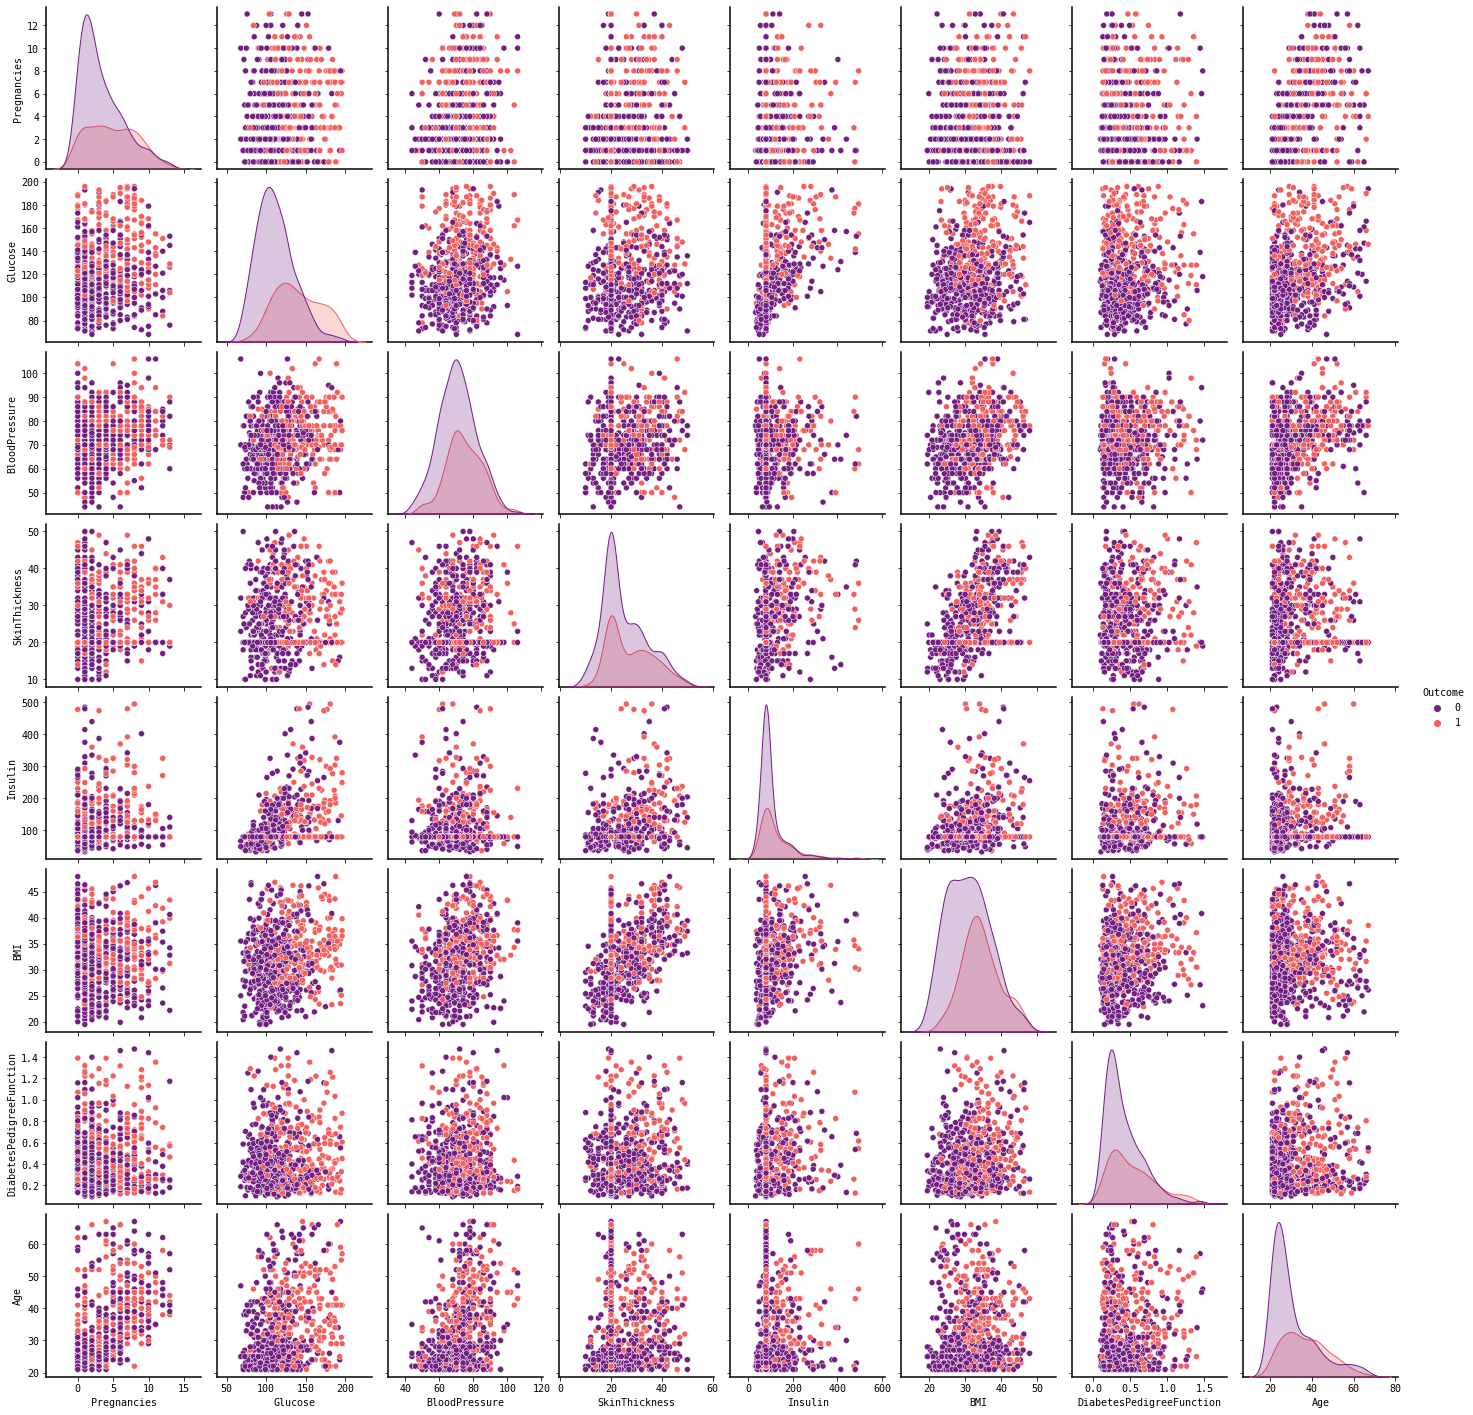

In [27]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,8), facecolor=background_color)
sns.pairplot(df,hue='Outcome',palette="magma")

<AxesSubplot:>

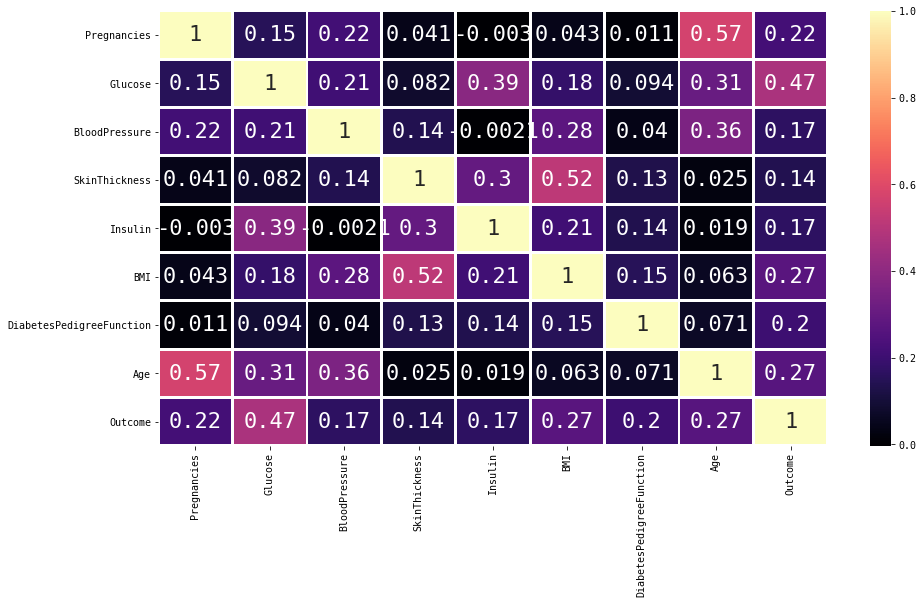

In [29]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,8), facecolor=background_color)
sns.heatmap(df.corr(), 
            annot=True,
            cmap = "magma",
            linewidths=2,
            linecolor = "white",
            cbar=True,
            annot_kws={"size":22})

# 12.Split The Dataset

In [30]:
#Feature Variables
X = df.drop('Outcome',axis=1)
#Target Variable
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=44)
print("x-train ",X_train.shape)
print("x-test ",X_test.shape)
print("Y-train ",y_train.shape)
print("Y-test ",y_test.shape)

x-train  (473, 8)
x-test  (204, 8)
Y-train  (473,)
Y-test  (204,)


# 13.Scale Data

In [31]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

# 14.Create Logistic Regression Model

In [33]:
clf = LogisticRegression(random_state=0).fit(X_train_sc, y_train)
# Predicting the test set results and calculating the accuracy
y_pred = clf.predict(X_test_sc)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(clf.score(X_test_sc, y_test)*100))

Accuracy of logistic regression classifier on test set: 73.04%


 ### The mean and the std of the cross validation results can then be used as a baseline for you final model.

In [34]:
# Determine Baseline Model
cv_results = cross_val_score(clf,X,y,cv=5, scoring='accuracy')

# Find the mean & std
print("Mean Accuracy {:.2f}%".format(np.mean(cv_results)*100))
print("STD {:.2f}%".format(np.std(cv_results)*100))

val_train = round(clf.score(X_train_sc, y_train),2)*100
val_test = round(clf.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

C:\Users\Surface\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Surface\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Surface\anaconda3\lib\site-pa

Mean Accuracy 74.90%
STD 2.01%
Training Accuracy: 78.0%
Test Set Accuracy: 73.0%


C:\Users\Surface\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Surface\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# 15.Compare Results to Baseline

In [35]:
# Compare Results to Baseline
confusion_matrix(y_test, y_pred)

array([[110,  20],
       [ 35,  39]], dtype=int64)

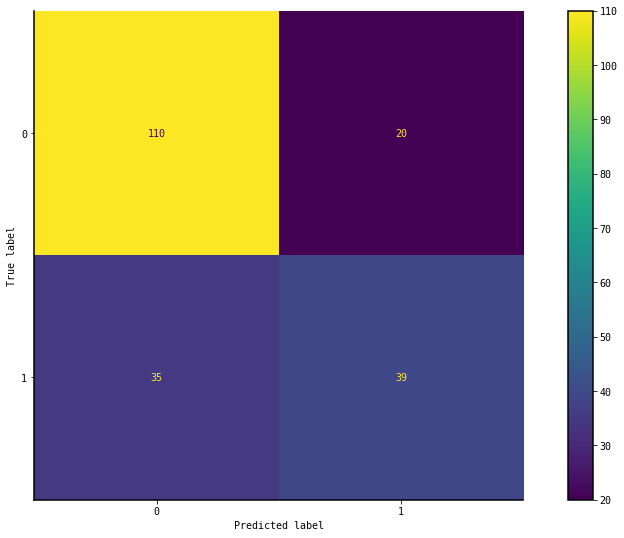

In [36]:
# make a simple confusion matrix
plot_confusion_matrix(clf, X_test_sc, y_test);

# 16.Apply PCA

In [87]:
# ---------------Scale Data---------------------

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

# ---------------Apply PCA---------------------

# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)
pd.Series(pca.explained_variance_ratio_) 

0    0.278981
1    0.200095
2    0.136947
3    0.116754
4    0.100322
5    0.066131
6    0.054439
7    0.046331
dtype: float64

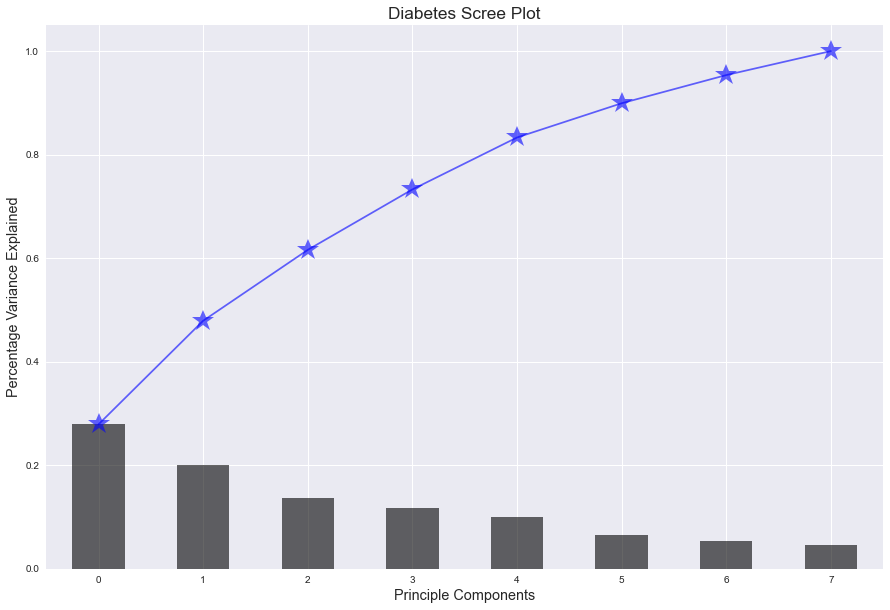

In [103]:
plt.style.use("seaborn")
plt.figure(figsize=(15,10))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.6,color = "black") # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="*",markersize = 23, alpha=0.6, color = 'blue') #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [105]:
# Fit PCA & Apply the Results to a Logistic Regression Model

# fit PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=2085) # Set max_iter so model reaches convergence

logreg = LogisticRegression()


#### Comparing Training Times

We will compare how long it takes to train a model using PCA and not using PCA

We will time our code using the magic command `%time`. Even though the dataset is hard we should expect to see a small decrease in the amount fo time it take to train a PCA model versus a non-PCA model since we have reduced the amount fo features to train.

[%timeit docs](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

In [106]:
# Measure how long it takes to train without PCA

%timeit logreg_noPCA.fit(X_train, y_train)

40.4 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [107]:
# Measure how long it takes to train with PCA

%timeit logreg.fit(X_train_pca, y_train)

3 ms ± 86.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Evaluate Model

In [108]:
print(f'Training accuracy:{round(logreg.score(X_train_pca, y_train)*100)}%')
print(f'Testing accuracy:{round(logreg.score(X_test_pca, y_test)*100)}%')

Training accuracy:73%
Testing accuracy:70%


In [109]:
pd.Series(pca.explained_variance_ratio_) 

0    0.270231
1    0.210263
2    0.139586
dtype: float64

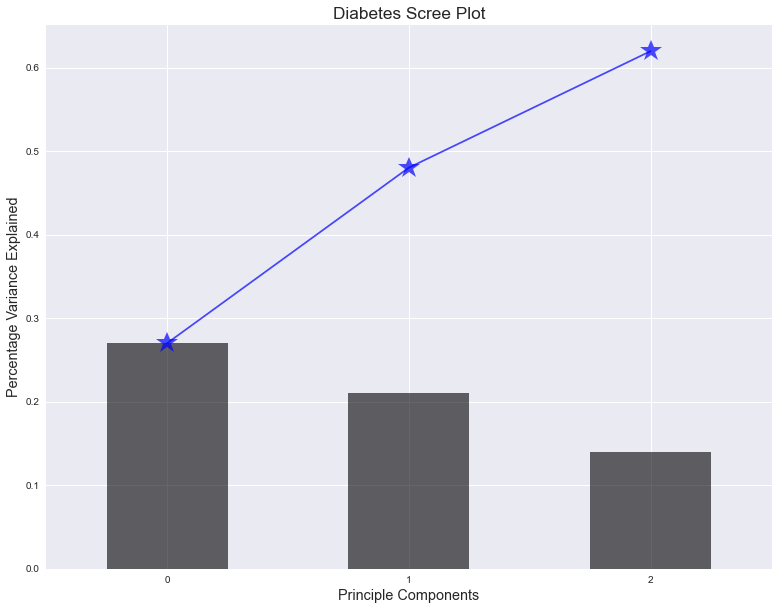

In [110]:
plt.style.use("seaborn")
plt.figure(figsize=(13,10))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.6,color = "black") # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="*",markersize = 23, alpha=0.7, color = 'blue' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

#### PCA and Pipelines

Now that we know the steps needed to perform PCA, lets use a pipeline to perform all steps in order. Notice that we are specifying the `n_components` hyper-parameter since the results achieved using only 3 principle components.

In [55]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components=3),
    # Step-3 fit the principles to the ML model
    LogisticRegression()
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7009803921568627

In [56]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       130
           1       0.63      0.43      0.51        74

    accuracy                           0.70       204
   macro avg       0.68      0.64      0.65       204
weighted avg       0.69      0.70      0.69       204



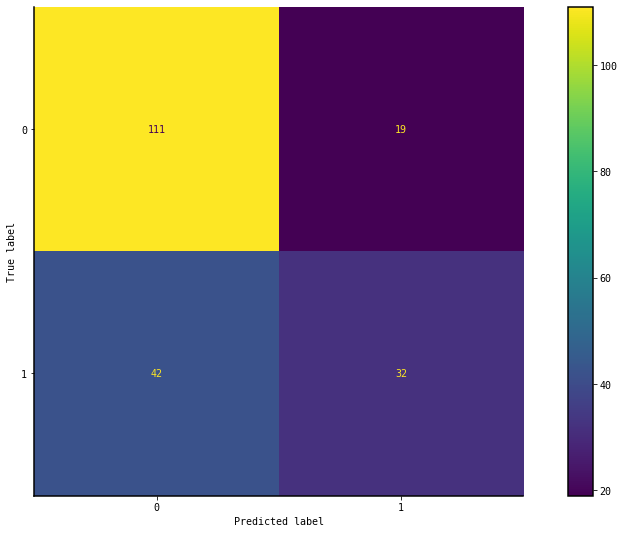

In [57]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);